# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [4]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [6]:
cat=Table.read('./data/dmu26_XID+MIPS_CDFS-SWIRE_cat.fits')

In [18]:
cat

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool
HELP_J033650.824-295620.783,54.211766390022845,-29.9391064859918,272.50247,540.70447,86.236374,-0.003483794,5.029496e-06,1.0027044,1124.0,0.0,False
HELP_J033655.442-295449.596,54.23101021455793,-29.91377659143576,236.55391,506.73215,68.16577,-0.0006361296,5.0581343e-06,0.9994119,1476.0,0.0,False
HELP_J033616.314-295548.181,54.067976200022855,-29.9300503059918,301.9198,318.07288,286.00903,-0.004160782,5.0500876e-06,nan,1700.0,0.0,False
HELP_J033601.094-295546.425,54.00455690002285,-29.929562435991798,81.58568,95.428375,67.528366,0.0016651336,4.938521e-06,nan,1122.0,0.0,False
HELP_J033608.786-295409.821,54.03660934002285,-29.9027279559918,6.9124126,15.632443,2.0185032,-0.0052455342,5.063621e-06,nan,2000.0,0.0,True
HELP_J033606.888-295518.496,54.028701300022846,-29.9218044959918,36.028355,50.140163,21.682087,-0.0052455342,5.063621e-06,nan,719.0,0.0,False
HELP_J033610.856-295506.940,54.04523478002285,-29.918594405991797,250.45511,263.87708,237.46614,-0.0052455342,5.063621e-06,nan,1863.0,0.0,False
HELP_J033607.350-295516.790,54.030623590022856,-29.9213304359918,184.89633,199.12378,170.45247,-0.0052455342,5.063621e-06,nan,1419.0,0.0,False


## Look at Symmetry of PDFs to determine depth level of catalogue

<ipython-input-12-2e7aa188d762>:5: RuntimeWarning: invalid value encountered in log10
  g=sns.jointplot(x=np.log10(cat['F_MIPS_24'][use]),y=skew[use], kind='hex')


4.9886394


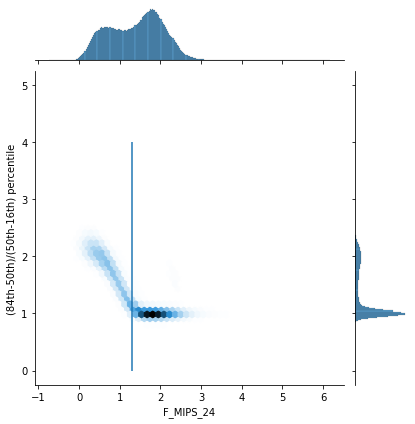

In [12]:
import seaborn as sns
skew=(cat['FErr_MIPS_24_u']-cat['F_MIPS_24'])/(cat['F_MIPS_24']-cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
g.ax_joint.vlines(1.3, 0, 4)

print(np.max(skew[use]))
# g.savefig('../../data/figs/sk_MIPS_HDF-N.pdf', bbox='tight')
# g.savefig('../../data/figs/sk_MIPS_HDF-N.png', bbox='tight')


In [13]:
10**1.3

19.952623149688797

Both seem to have flux pdfs that become Gaussian at ~20$\mathrm{\mu Jy}$ 

## Add flag to catalogue

In [14]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_mips_24'))


In [15]:
ind=(cat['Pval_res_24']>0.5) | (cat['F_MIPS_24'] < 20.0)


In [16]:
cat['flag_mips_24'][ind]=True

In [17]:
cat.write('./data/dmu26_XID+MIPS_CDFS-SWIRE_cat_20201205.fits', format='fits',overwrite=True)

### Check Map


In [5]:
from astropy.io import fits
import pylab as plt

In [8]:
MIPS_pval=fits.open('./data/dmu26_XID+MIPS_CDFS-SWIRE_Bayes_Pval_20201205.fits')
MIPS_pval2=fits.open('./data/old/dmu26_XID+MIPS_CDFS-SWIRE_Bayes_Pval_20170901.fits')


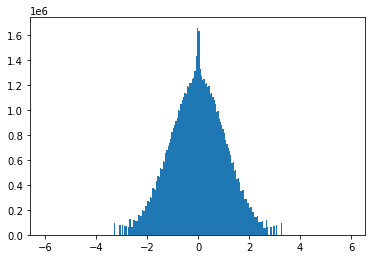

In [7]:
plt.hist(MIPS_pval[1].data[np.isfinite(MIPS_pval[1].data)],bins=np.arange(-6,6,0.05));

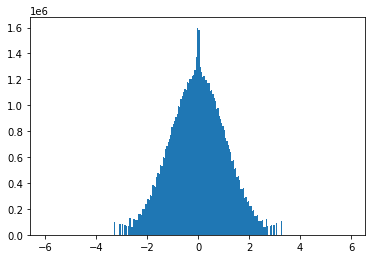

In [9]:
plt.hist(MIPS_pval2[1].data[np.isfinite(MIPS_pval2[1].data)],bins=np.arange(-6,6,0.05));

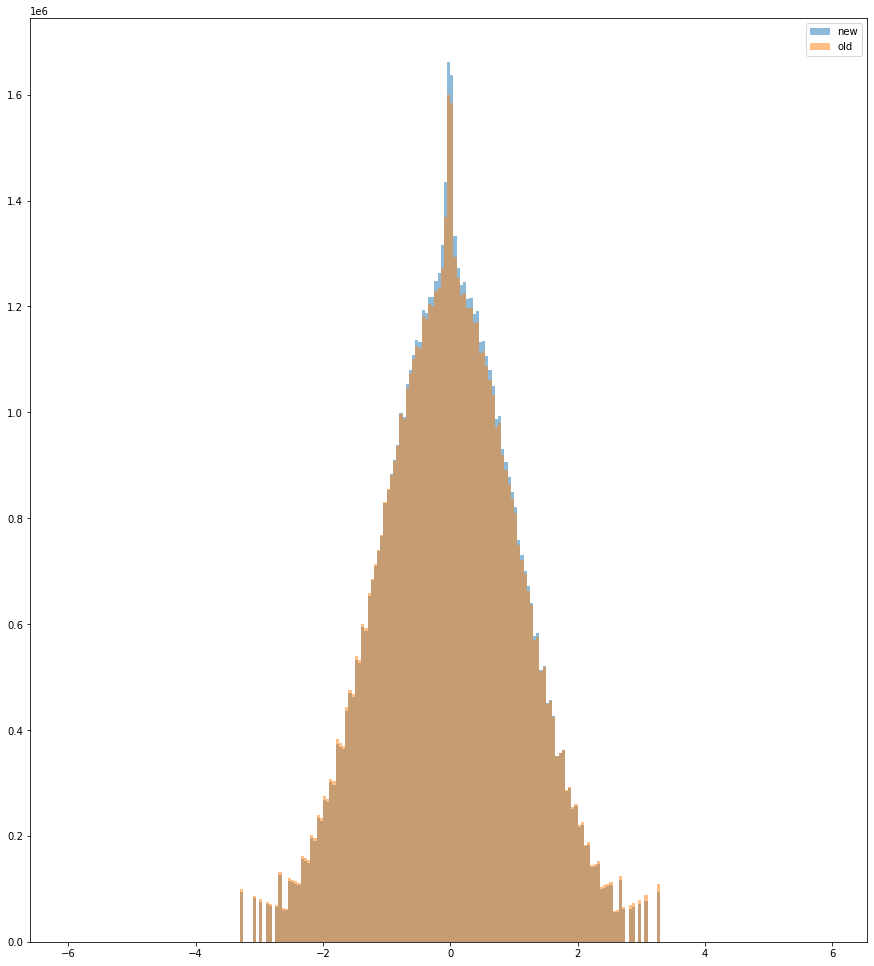

In [11]:
plt.figure(figsize=(15,17))
plt.hist(MIPS_pval[1].data[np.isfinite(MIPS_pval[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='new');
plt.hist(MIPS_pval2[1].data[np.isfinite(MIPS_pval2[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='old');
plt.legend()